# Clustering - Introduction

- **Unsupervised Learning**: Used when there is no "ground truth" for training and validation
- **Clustering**: Most common form of unsupervised learning
- **Clustering vs Classification**: Similar conceptually, but training data lacks known class labels
- **How Clustering Works**: Separates training cases based on similarities in feature values
- **Vector Space Representation**: Numeric features define entities as coordinates in n-dimensional space
- **Goal**: Identify groups (clusters) of entities that are close together while being separated from other clusters



### To take a look at the data that contains measurements of different species of wheat seed.

In [5]:
import pandas as pd

data = pd.read_csv("../../generated/data/raw/seeds.csv")
# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
print(features.sample(10))


      area  perimeter  compactness  kernel_length  kernel_width  \
151  12.01      13.52       0.8249          5.405         2.776   
108  19.94      16.92       0.8752          6.675         3.763   
72   17.26      15.73       0.8763          5.978         3.594   
81   18.72      16.19       0.8977          6.006         3.857   
102  19.46      16.50       0.8985          6.113         3.892   
118  18.89      16.23       0.9008          6.227         3.769   
88   21.18      17.21       0.8989          6.573         4.033   
40   13.54      13.85       0.8871          5.348         3.156   
23   12.08      13.23       0.8664          5.099         2.936   
76   17.32      15.91       0.8599          6.064         3.403   

     asymmetry_coefficient  
151                  6.992  
108                  3.252  
72                   4.539  
81                   5.324  
102                  4.308  
118                  3.639  
88                   5.780  
40                   2.587  
2

### *Principal Component Analysis* (PCA)

- Unsupervised learning: used when no ground-truth labels are available for training or validation
- Clustering: groups observations by similarity of their feature values; similar to classification but without labeled training data
- Mechanism: numeric features treated as coordinates in n-dimensional space; clustering separates points by proximity/similarity
- Goal: find clusters that are internally close and well separated from others
- Dataset note: each seed is described by six \*features\* (six-dimensional), which is hard to visualize directly


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
print(features_2d[0:10])

[[ 0.11883593 -0.09382469]
 [ 0.0696878  -0.31077233]
 [-0.03499184 -0.37044705]
 [-0.06582089 -0.36365235]
 [ 0.32594892 -0.37695797]
 [-0.02455447 -0.31060184]
 [-0.00769646 -0.07594931]
 [-0.05646955 -0.26696284]
 [ 0.38196305 -0.05149471]
 [ 0.35701044 -0.17697998]]


#### Reasons to use Principal Component Analysis \(PCA\)
- Reduce dimensionality: compress six dimensions to two while retaining most variance
- Enable visualization: map high-dimensional data to 2D for plots and visual cluster inspection
- Noise reduction: low-variance components often capture noise and can be discarded
- Decorrelate features: produce orthogonal (uncorrelated) principal components
- Improve clustering: fewer dimensions can speed algorithms and reduce overfitting
- Preserve maximal variance: PCA finds directions that capture the largest variability
- Aid interpretation: principal components reveal dominant patterns among original \*features\*

#### To visualize them in a plot

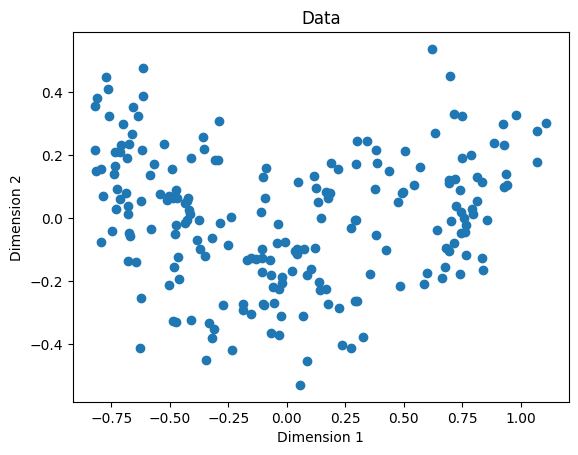

In [7]:
import matplotlib.pyplot as plt

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

- **Interpretation of the plotted graph**
  - At least two, possibly three, distinct groups of points are visible
  - Cluster centers appear relatively compact, but some points lie near boundaries
  - Ambiguity in the exact number of clusters: visual inspection alone is inconclusive
  - Lack of ground-truth labels means the plot suggests hypotheses, not definitive classes
  - Further quantitative evaluation (e.g., WCSS/elbow, silhouette) is needed to decide cluster count

- Reasons to use **within cluster sum of squares** (WCSS)
  - Measures cluster tightness / compactness: lower WCSS = points closer to their cluster centers
  - Provides a scalar metric to compare different numbers of clusters
  - Plotting WCSS vs. number of clusters reveals diminishing returns (the "elbow") to guide k choice
  - Simple and fast to compute for many clustering algorithms (e.g., k-means)
  - Monotonic decrease with increasing k, so the elbow (not the minimum) indicates a useful tradeoff
  - Sensitive to feature scale, so normalize features before computing WCSS

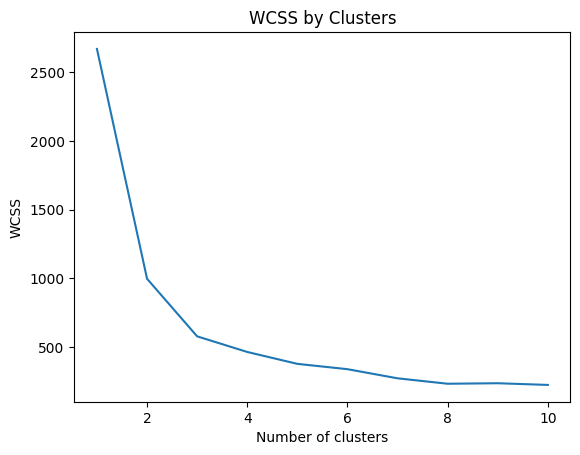

In [8]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.



## Summary

Here we looked at what clustering means, and how to determine whether clustering might be appropriate for your data. In the next notebook, we will look at two ways of
labelling the data automatically.